# Iris Classification

We will be using the Iris dataset provided with scikit-learn to build a model to predict the species of iris flowers. Although the Iris is a genus of 260-300 species, we will only be covering the Setosa, Versicolor, and Virginica species in this demonstration.

Each sample in our dataset has the length and widths of the sepal and petal of each flower (our features). It also has the species of the flower (the target). Our goal is to be able to identify the species of a plant given its sepal and petal measurements. This is a supervised learning problem given our targets are provided with the data, and a classification problem since there are a finite number of species as a solution.

## Loading the Dataset

In [18]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

# See the attributes of our dataset:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [19]:
# See the description of each attribute:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Note that the data is made up of 150 samples, which is relative small for a classification problem. On the other hand, the data is perfectly balanced with 50 samples from each class.

Our four features include: _sepal length_, _sepal width_, _petal length_, and _petal width_. All of these are numeric with no missing values.

According to out summary statistics, the dataset has a strong correction between petal dimensions and class values. Normally we would only want to calculate summary statistics on the training data, leaving the rest to free in the wild to test the model later. However, we will ignore this information for the sake of this example. 

In [20]:
# See the name of our features:
print('Features: \n', iris.feature_names, '\n')

# See the first ten samples:
print('Samples: \n', iris.data[:10])

Features: 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 

Samples: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


Our target variable has three possible values: 0 for **Iris-Setosa**, 1 for **Iris-Versicolor**, and 2 for **Iris-Virginica**.

Now that we know more about the data we're dealing with, let's load it into a `pandas` dataframe.

In [21]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add out 'target' column:
df['target'] = pd.Series(iris.target)

# Map our numerical target values to the class names:
df['target_name'] = df['target'].apply(lambda y: iris.target_names[y])

# See a sample of the DataFrame:
df.sample(n=5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
35,5.0,3.2,1.2,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
128,6.4,2.8,5.6,2.1,2,virginica
30,4.8,3.1,1.6,0.2,0,setosa
80,5.5,2.4,3.8,1.1,1,versicolor


The `sample` method will return a random sample of n rows from the dataset. This means we will get a random subset each time we run the code. To alleviate this, we can supply a seed value by setting the `random_state` parameter. For example:

In [22]:
df.sample(n=5, random_state=42)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
73,6.1,2.8,4.7,1.2,1,versicolor
18,5.7,3.8,1.7,0.3,0,setosa
118,7.7,2.6,6.9,2.3,2,virginica
78,6.0,2.9,4.5,1.5,1,versicolor
76,6.8,2.8,4.8,1.4,1,versicolor


## Spitting the Data into Training and Test Sets

Now it's time to divide our DataFrame into a training set and a test set. We'll use 70% of the data for training and the other 30% for testing.

In [23]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3)

# Check the size of our training and test sets:
print('Training dataset entries: ', df_train.shape[0])
print('Testing dataset entries: ', df_test.shape[0])

Training dataset entries:  105
Testing dataset entries:  45


Now we will define our x and y variables, for our features and target variable respectively.

In [24]:
# Training set:
x_train = df_train[iris.feature_names]
y_train = df_train['target']

# Testing set:
x_test = df_test[iris.feature_names]
y_test = df_test['target']

## Training Our Model & Generating Predictions

For simplicity we will use the default configuration of the `DecisionTreeClassifier` class as our model.

In [25]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

# Fitting the model:
clf.fit(x_train, y_train)

# Make predictions on the test set:
y_test_pred = clf.predict(x_test)

# Evaluating Our Model

We can now compare our y_test_pred to our y_test to see how accurate our model is. Provided our dataset is perfectly balanced, it is best to use the `accuracy` metric here.

In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.9333333333333333

We've just trained our supervised learning model! Now we can take a closer look to see which features were most important in deciding our iris species. 

We will use the `feature_importances_` method of the `DecisionTreeClassifer` to see which features were most useful.

In [27]:

pd.DataFrame(
    {
        'feature_names': iris.feature_names,
        'feature_importance': clf.feature_importances_,
    }
).sort_values(by='feature_importance', ascending=False
).set_index('feature_names')


,feature_importance
feature_names,
petal length (cm),0.532602
petal width (cm),0.442498
sepal length (cm),0.024900
sepal width (cm),0.000000


These results confirm the dataset descriptions displayed earlier which stated petal and and width were highly correlated to our target variable.

We can print the internal structure of our learning tree to see how the tree was built.

In [28]:
from sklearn.tree import export_text

print(
    export_text(
        clf, feature_names=iris.feature_names, spacing=3, decimals=1
    )
)

|--- petal length (cm) <= 2.4
|   |--- class: 0
|--- petal length (cm) >  2.4
|   |--- petal width (cm) <= 1.8
|   |   |--- sepal length (cm) <= 5.0
|   |   |   |--- class: 2
|   |   |--- sepal length (cm) >  5.0
|   |   |   |--- petal length (cm) <= 4.9
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.9
|   |   |   |   |--- petal width (cm) <= 1.6
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.6
|   |   |   |   |   |--- class: 1
|   |--- petal width (cm) >  1.8
|   |   |--- class: 2



# Getting the Best Model

What can be done to get a more reliable score?

One way is to run the process multiple times to get the distribution of the different scores. Below we run through the process of splitting, training, and testing our model 100 times.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a list to hold our scores from each iteration:
accuracy_scores = []

for _ in range(100):
    
    # Split the data into a training and testing set:
    df_train, df_test = train_test_split(df, test_size=0.3)

    x_train = df_train[iris.feature_names]
    x_test = df_test[iris.feature_names]

    y_train = df_train['target']
    y_test = df_test['target']

    # Create a new classifier:
    clf = DecisionTreeClassifier()

    # Training and predicting:
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)

    # Add the accuracy score to the list of scores:
    accuracy_scores.append(
        round(accuracy_score(y_test, y_pred), 3)
    )


# Convert the list of accuracy scores to a pandas series:
accuracy_scores = pd.Series(accuracy_scores)

# Visualizing the Results

Average Score: 0.944 [5th percentile: 0.91 | 95th percentile: 1.0]


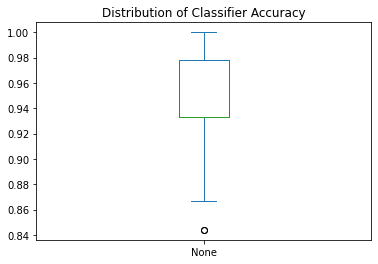

In [30]:
# Plot the accuracy distribution using a box plot:
accuracy_scores.plot(
    title='Distribution of Classifier Accuracy',
    kind='box',
)

print(
    'Average Score: {:.3} [5th percentile: {:.3} | 95th percentile: {:.3}]'.format(
        accuracy_scores.mean(),
        accuracy_scores.quantile(0.05),
        accuracy_scores.quantile(0.95),
    )
)

# Data Shuffling

When we run different train and test splits (also called cross validation), we recieve more reliable results when it comes to estimating the accuracy of our model.

The `ShuffleSplit` modules allows us to take advantage of Monte Carlo cross validation. This method will provide a list of indices that can use for splitting our data. To implement this, we'll have to use the `loc` method provided with DataFrames to randomly split our data set into 100 pairs of training and test sets.

In [31]:
from sklearn.model_selection import ShuffleSplit

accuracy_scores = []

# Create the ShuffleSplit instance:
shuffle = ShuffleSplit(n_splits=100, test_size=0.3)

# Generate 100 pairs of indices:
for train_index, test_index in shuffle.split(df):
    
    x_train = df.loc[train_index, iris.feature_names]
    x_test = df.loc[test_index, iris.feature_names]
    
    y_train = df.loc[train_index, 'target']
    y_test = df.loc[test_index, 'target']
    
    clf = DecisionTreeClassifier()
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    
    accuracy_scores.append(round(accuracy_score(y_test, y_pred), 3))

accuracy_scores = pd.Series(accuracy_scores)

To simplify our work even more we can use scikit-learn's `cross_validate` functionality as follows:

In [32]:
from sklearn.model_selection import cross_validate

clf = DecisionTreeClassifier()
shuffle = ShuffleSplit(n_splits=100, test_size=0.3)

x = df[iris.feature_names]
y = df['target']

cv_results = cross_validate(clf, x, y, cv=shuffle, scoring='accuracy')

accuracy_scores = pd.Series(cv_results['test_score'])

Cross-validation is always a good idea, especially when you have a small dataset. Accuracy scores give a better understanding of how well our model is performing.